# Moving Average Crossover Strategy
 Concept: Buy when a short-term moving average (e.g., 10-day MA) crosses above a long-term moving average (e.g., 50-day MA), and sell when it crosses below.

* Type: Trend-following

* Assets: Stocks, ETFs, crypto

* Pros: Simple, widely used

* Cons: Can produce whipsaws in sideways markets



## Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf
from datetime import date

%load_ext autoreload
%autoreload 2

## Load Data From YFinance

In [3]:
df_aapl = yf.download('AAPL', start='2020-01-01')

df_aapl = df_aapl.droplevel(axis=1, level=1)

df_aapl.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914825,72.676454,71.689965,71.847125,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146957,72.753839,71.926930,72.497545,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


## Developing the Strategy

### Generate Trading Signals

In [4]:
# Short Signal
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()

# Long Signal
df_aapl['SMA200'] = df_aapl['Close'].rolling(window=200).mean()

# Drop rows where signals are missing due to lack of data
df_aapl.dropna(inplace=True)

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Date,,,,,,,
2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,113.858166,86.063327
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961830,86.279744
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056631,86.484889
2020-10-20,114.433800,115.865319,112.603010,113.158088,124423700,114.149778,86.694619
2020-10-21,113.810562,115.602391,113.401551,113.615793,89946000,114.295754,86.902937


In [5]:
# If the short signal rises above the long signal, then we are in a buying position
df_aapl['Signal'] = (df_aapl['SMA50'] > df_aapl['SMA200']) * 1

df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Date,,,,,,,,
2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,113.858166,86.063327,1
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961830,86.279744,1
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056631,86.484889,1
2020-10-20,114.433800,115.865319,112.603010,113.158088,124423700,114.149778,86.694619,1
2020-10-21,113.810562,115.602391,113.401551,113.615793,89946000,114.295754,86.902937,1


In [6]:
markers = df_aapl['Signal'].diff().fillna(df_aapl['Signal'].iloc[0])
buy_markers = markers[markers == 1]
sell_markers = markers[markers == -1]
print(buy_markers, sell_markers)

Date
2020-10-15    1.0
2022-09-26    1.0
2023-03-22    1.0
2024-06-13    1.0
Name: Signal, dtype: float64 Date
2022-06-03   -1.0
2022-10-07   -1.0
2024-03-14   -1.0
2025-04-07   -1.0
Name: Signal, dtype: float64


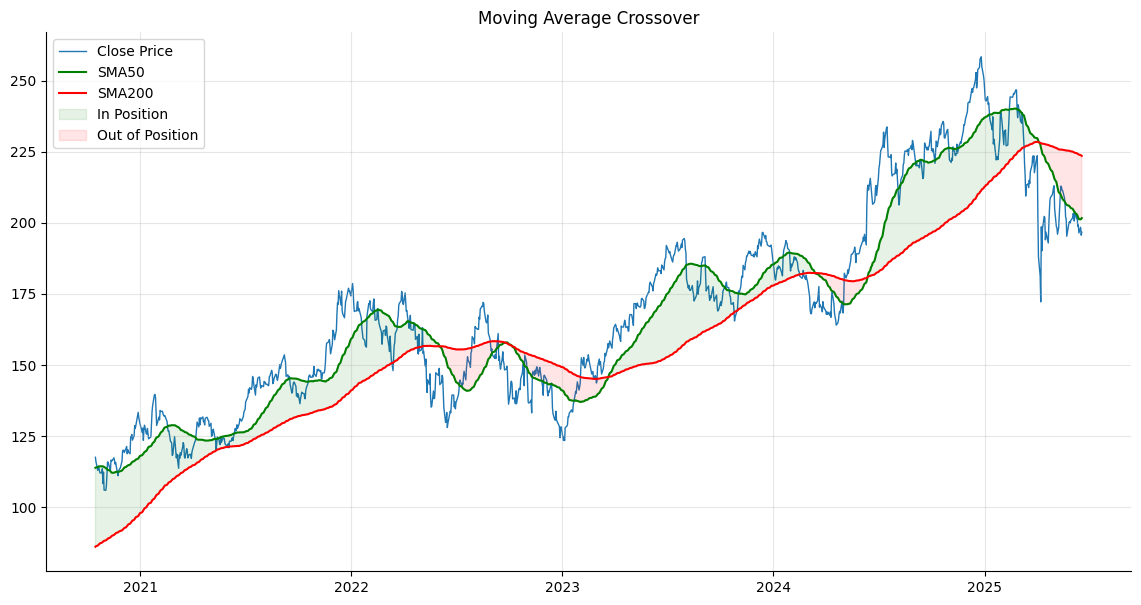

In [7]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.plot(df_aapl['SMA50'], label='SMA50', color='Green', alpha=1, zorder=2)
ax.plot(df_aapl['SMA200'], label='SMA200', color='Red', alpha=1, zorder=3)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                    color='Green',
                    alpha=0.1,
                    label="In Position")

ax.fill_between(df_aapl.index,
                    df_aapl['SMA50'],
                    df_aapl['SMA200'],
                    where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                    color='Red',
                    alpha=0.1,
                    label="Out of Position")          

ax.legend(loc='upper left')

plt.show;

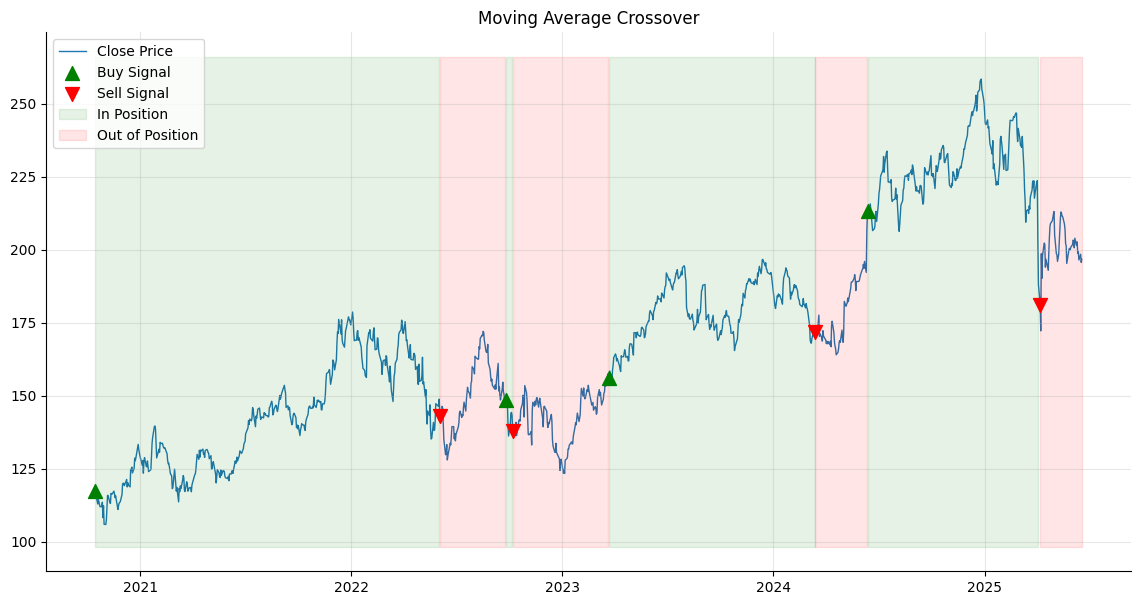

In [8]:
fig, ax = plt.subplots(figsize=(14,7))

ax.set_title('Moving Average Crossover')
ax.plot(df_aapl['Close'], label='Close Price', linestyle='-', linewidth=1, alpha=1, zorder=1)
ax.scatter(x=buy_markers.index, y=df_aapl['Close'].loc[buy_markers.index], marker='^', s=100, color='Green', label='Buy Signal', zorder=4)
ax.scatter(x=sell_markers.index, y=df_aapl['Close'].loc[sell_markers.index], marker='v', s=100, color='Red', label='Sell Signal', zorder=5)
ax.spines[["top", "right"]].set(visible=False)
ax.grid(alpha=0.3)

y_min, y_max = ax.get_ybound()

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

# Prevents duplicate keys being added to the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc="upper left")

plt.show;

### Calculate Returns

In [9]:
df_aapl['Position'] = df_aapl['Signal'].shift(1)
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position
Date,,,,,,,,,
2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,113.858166,86.063327,1,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961830,86.279744,1,1.0
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056631,86.484889,1,1.0
2020-10-20,114.433800,115.865319,112.603010,113.158088,124423700,114.149778,86.694619,1,1.0
2020-10-21,113.810562,115.602391,113.401551,113.615793,89946000,114.295754,86.902937,1,1.0
...,...,...,...,...,...,...,...,...,...
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700,201.205285,223.838227,0,0.0


In [10]:
df_aapl['Daily_Ret'] = df_aapl['Close'].pct_change()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret
Date,,,,,,,,,,
2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,113.858166,86.063327,1,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961830,86.279744,1,1.0,-0.014001
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056631,86.484889,1,1.0,-0.025542
2020-10-20,114.433800,115.865319,112.603010,113.158088,124423700,114.149778,86.694619,1,1.0,0.013192
2020-10-21,113.810562,115.602391,113.401551,113.615793,89946000,114.295754,86.902937,1,1.0,-0.005446
...,...,...,...,...,...,...,...,...,...,...
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700,201.205285,223.838227,0,0.0,0.010028


In [11]:
df_aapl['Strategy_Ret'] = df_aapl['Position'] * df_aapl['Daily_Ret']
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret
Date,,,,,,,,,,,
2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,113.858166,86.063327,1,NaN,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961830,86.279744,1,1.0,-0.014001,-0.014001
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056631,86.484889,1,1.0,-0.025542,-0.025542
2020-10-20,114.433800,115.865319,112.603010,113.158088,124423700,114.149778,86.694619,1,1.0,0.013192,0.013192
2020-10-21,113.810562,115.602391,113.401551,113.615793,89946000,114.295754,86.902937,1,1.0,-0.005446,-0.005446
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113,0.000000
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805,-0.000000
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700,201.205285,223.838227,0,0.0,0.010028,0.000000


In [12]:
df_aapl['Daily_Cum_Returns'] = (1 + df_aapl['Daily_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns
Date,,,,,,,,,,,,
2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,113.858166,86.063327,1,NaN,NaN,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961830,86.279744,1,1.0,-0.014001,-0.014001,0.985999
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056631,86.484889,1,1.0,-0.025542,-0.025542,0.960815
2020-10-20,114.433800,115.865319,112.603010,113.158088,124423700,114.149778,86.694619,1,1.0,0.013192,0.013192,0.973490
2020-10-21,113.810562,115.602391,113.401551,113.615793,89946000,114.295754,86.902937,1,1.0,-0.005446,-0.005446,0.968188
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113,0.000000,1.694598
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805,-0.000000,1.671203
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700,201.205285,223.838227,0,0.0,0.010028,0.000000,1.687962


In [13]:
df_aapl['Strategy_Cum_Returns'] = (1 + df_aapl['Strategy_Ret']).cumprod()
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret,Daily_Cum_Returns,Strategy_Cum_Returns
Date,,,,,,,,,,,,,
2020-10-15,117.550026,118.027197,115.057045,115.612123,112559200,113.858166,86.063327,1,NaN,NaN,NaN,NaN,NaN
2020-10-16,115.904266,118.368042,115.699765,118.105106,115393800,113.961830,86.279744,1,1.0,-0.014001,-0.014001,0.985999,0.985999
2020-10-19,112.943832,117.267595,112.632210,116.819638,120639300,114.056631,86.484889,1,1.0,-0.025542,-0.025542,0.960815,0.960815
2020-10-20,114.433800,115.865319,112.603010,113.158088,124423700,114.149778,86.694619,1,1.0,0.013192,0.013192,0.973490,0.973490
2020-10-21,113.810562,115.602391,113.401551,113.615793,89946000,114.295754,86.902937,1,1.0,-0.005446,-0.005446,0.968188,0.968188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113,0.000000,1.694598,1.059176
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805,-0.000000,1.671203,1.059176
2025-06-16,198.419998,198.690002,196.559998,197.300003,43020700,201.205285,223.838227,0,0.0,0.010028,0.000000,1.687962,1.059176


## Analysis of Strategy Performance

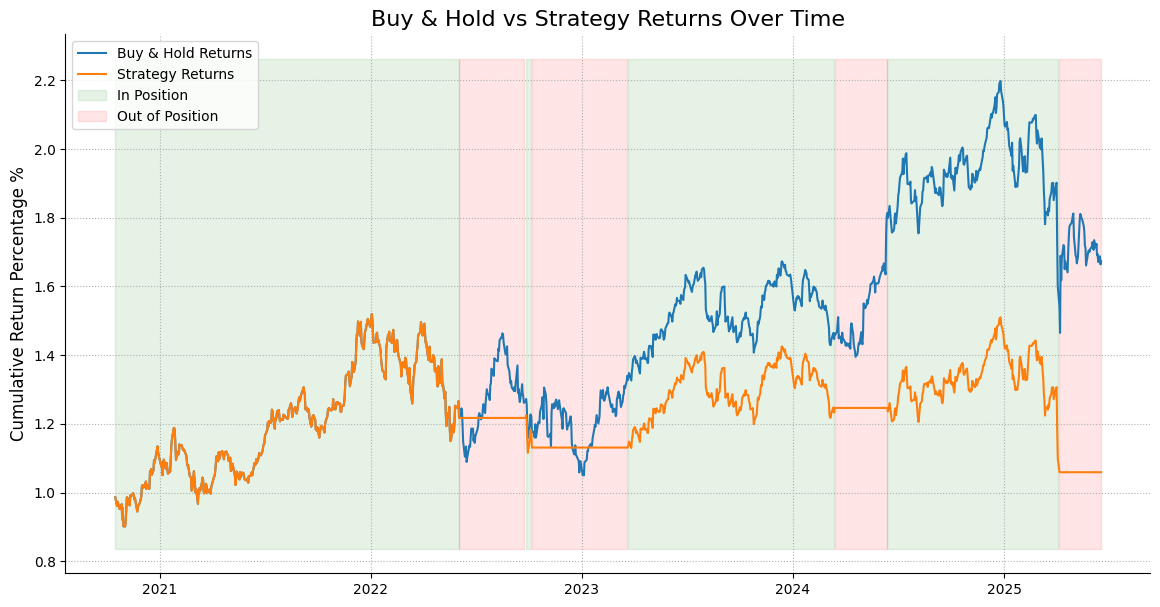

In [14]:
fig, ax = plt.subplots(figsize=(14,7))
# ax.plot(df_aapl['Close'])
ax.set_title("Buy & Hold vs Strategy Returns Over Time", fontsize=16)
ax.set_ylabel("Cumulative Return Percentage %", fontsize=12)
ax.plot(df_aapl['Daily_Cum_Returns'], label='Buy & Hold Returns')
ax.plot(df_aapl['Strategy_Cum_Returns'], label='Strategy Returns')
ax.grid(alpha=1, linestyle=":")
ax.spines[["top", "right"]].set(visible=False)

y_min, y_max = ax.get_ybound()

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] > df_aapl['SMA200']),
                color='Green',
                alpha=0.1,
                label='In Position')

ax.fill_between(df_aapl.index,
                y_max,
                y_min,
                where=(df_aapl['SMA50'] < df_aapl['SMA200']),
                color='Red',
                alpha=0.1,
                label='Out of Position')

ax.legend(loc="upper left")

plt.show;

## Writing a function to backtest

In [15]:
df_aapl.Close.to_frame()

,Close
Date,
2020-10-15,117.550026
2020-10-16,115.904266
2020-10-19,112.943832
2020-10-20,114.433800
2020-10-21,113.810562
...,...
2025-06-12,199.199997
2025-06-13,196.449997
2025-06-16,198.419998


In [16]:
def backtest_ma_strategy(df: pd.DataFrame = pd.DataFrame(),
                         ticker: str = "AAPL",
                         start_date: str = str(date.today().year - 5) + "-01-01",
                         end_date: str = str(date.today()),
                         short_window: int = 50,
                         long_window: int = 200,
):
    """
    Backtest a simple moving average trading strategy.
    """

    if df.empty:
        if ticker == None:
            print('Ticker Needed')
            return

        # Download Ticker Price Data
        df_backtest = yf.download(ticker, start=start_date, end=end_date).droplevel(axis=1, level=1)
    else:
        df_backtest = df.copy()

    # Short Signal
    df_backtest['short_ma'] = df_backtest['Close'].rolling(window=short_window).mean()
    # Long Signal
    df_backtest['long_ma'] = df_backtest['Close'].rolling(window=long_window).mean()
    # Drop rows where signals are missing due to lack of data
    df_backtest.dropna(inplace=True)

    # When the short window closes above the long window, flag a buy signal
    df_backtest['signal'] = (df_backtest['short_ma'] > df_backtest['long_ma']) * 1
    # Position the days trade based on the previous close signal
    df_backtest['position'] = df_backtest['signal'].shift(1)

    # The daily price change of the stock
    df_backtest['daily_returns'] = df_backtest['Close'].pct_change()
    # The price change of the stock, only accounting for days we are in position
    df_backtest['strategy_returns'] = df_backtest['position'] * df_backtest['daily_returns']

    # The return on investment if we had bought and held from the start date
    df_backtest['daily_cum_returns'] = (1 + df_backtest['daily_returns']).cumprod()
    # The return on investment if we had traded and held the the stock signal
    df_backtest['strategy_cum_returns'] = (1 + df_backtest['strategy_returns']).cumprod()

    return df_backtest


In [17]:
df_test = backtest_ma_strategy()
df_test

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,,,,,
2020-10-15,117.550003,118.027174,115.057022,115.612100,112559200,113.858165,86.063325,1,NaN,NaN,NaN,NaN,NaN
2020-10-16,115.904259,118.368034,115.699757,118.105098,115393800,113.961829,86.279742,1,1.0,-0.014000,-0.014000,0.986000,0.986000
2020-10-19,112.943840,117.267603,112.632217,116.819646,120639300,114.056630,86.484887,1,1.0,-0.025542,-0.025542,0.960815,0.960815
2020-10-20,114.433800,115.865319,112.603010,113.158088,124423700,114.149776,86.694617,1,1.0,0.013192,0.013192,0.973490,0.973490
2020-10-21,113.810555,115.602383,113.401544,113.615786,89946000,114.295752,86.902935,1,1.0,-0.005446,-0.005446,0.968188,0.968188
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-11,198.779999,204.500000,198.410004,203.500000,60989900,202.312253,224.266183,0,0.0,-0.019194,-0.000000,1.691025,1.059176
2025-06-12,199.199997,199.679993,197.360001,199.080002,43904600,201.838299,224.131955,0,0.0,0.002113,0.000000,1.694598,1.059176
2025-06-13,196.449997,200.369995,195.699997,199.729996,51447300,201.295363,223.982284,0,0.0,-0.013805,-0.000000,1.671204,1.059176


## Risk / Return

In [18]:
# Our return is the average daily return on investment
# Our risk is how far this is likely to swing from day to day, i.e. volatility
summary = df_aapl[["Daily_Ret", "Strategy_Ret"]].agg(["mean", "std"]).T
summary.columns = ["Return", "Risk"]
summary

,Return,Risk
Price,,
Daily_Ret,0.000602,0.018101
Strategy_Ret,0.000151,0.014247


In [19]:
# Annualizing risk and reward
# There are roughly 252 business days per year
ann_summary = summary * (252, np.sqrt(252))
ann_summary

,Return,Risk
Price,,
Daily_Ret,0.151657,0.287348
Strategy_Ret,0.038037,0.226167


## Sharpe Ratio

In [20]:
# The risk free return is the return on an investment that is deemed to be risk free
# These are usually government bonds given by stable countries such as the US, Germany, or the UK
ann_risk_free_return = 0.05

In [21]:
# The Sharpe ratio compares investment reward against risk
# The higher the Sharpe ratio, the better the investment as the reward to risk ratio is stronger
ann_summary["Sharpe"] = (ann_summary["Return"] - 0.05) / ann_summary["Risk"]
ann_summary

,Return,Risk,Sharpe
Price,,,
Daily_Ret,0.151657,0.287348,0.353778
Strategy_Ret,0.038037,0.226167,-0.052897


* Our Strategy isn't a very good one, we would have been better to buy and hold the AAPL stock instead of trying to trade it using this method.
* Whilst our strategy is slightly less risky, the returns are much worse.
* I believe that this is due to missing out on initial price movements as the trend lines we use to signal trades lag behind actual price movements

### Writing a function to summarize annual returns and sharpe ratio

In [22]:
def get_summary(df: pd.DataFrame = pd.DataFrame()):

    summary = df.agg(["mean", "std"]).T.copy()
    summary.columns = ["Return", "Risk"]


    return summary

In [23]:
def get_ann_summary(df: pd.DataFrame = pd.DataFrame(),
                       periods_in_year: int = 252,
                       rfr: float = 0.05):

    ann_summary = get_summary(df) * (periods_in_year, np.sqrt(periods_in_year))
    ann_summary["Sharpe"] = (ann_summary["Return"] - rfr) / ann_summary["Risk"]


    return ann_summary

    

In [24]:
get_summary(df_aapl[['Daily_Ret', "Strategy_Ret"]])

,Return,Risk
Price,,
Daily_Ret,0.000602,0.018101
Strategy_Ret,0.000151,0.014247


In [25]:
get_ann_summary(df_aapl[['Daily_Ret', "Strategy_Ret"]])

,Return,Risk,Sharpe
Price,,,
Daily_Ret,0.151657,0.287348,0.353778
Strategy_Ret,0.038037,0.226167,-0.052897


## Backtesting through rolling windows

In [26]:
# We are creating windows in time of 1 year moving along month by month
# + 200 as this covers the period to determing the rolling 200 day window for which data will be null due to no signals
window_size=252 + 200
step=21
windows=[]
for i in range(0, len(df_aapl) - window_size, step):
    
    windows.append(df_aapl.iloc[i:i+window_size]["Close"].to_frame())

In [27]:
windows[10]

,Close
Date,
2021-08-17,147.198959
2021-08-18,143.445282
2021-08-19,143.778503
2021-08-20,145.238846
2021-08-23,146.728607
...,...
2023-05-26,173.690948
2023-05-30,175.542419
2023-05-31,175.492920


In [28]:
backtest_results = []

for window in windows:

    df_test = backtest_ma_strategy(window)
    

df_test

,Close,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,
2024-06-04,193.445312,177.084529,180.152421,0,NaN,NaN,NaN,NaN,NaN
2024-06-05,194.958237,177.587206,180.262244,0,0.0,0.007821,0.0,1.007821,1.000000
2024-06-06,193.574707,178.084876,180.358458,0,0.0,-0.007097,-0.0,1.000669,1.000000
2024-06-07,195.973495,178.558954,180.459775,0,0.0,0.012392,0.0,1.013069,1.000000
2024-06-10,192.221024,178.994363,180.523046,0,0.0,-0.019148,-0.0,0.993671,1.000000
...,...,...,...,...,...,...,...,...,...
2025-06-02,201.699997,204.964102,225.049983,0,0.0,0.004232,0.0,1.042672,0.849841
2025-06-03,203.270004,204.669819,224.961616,0,0.0,0.007784,0.0,1.050788,0.849841
2025-06-04,202.820007,204.317401,224.856052,0,0.0,-0.002214,-0.0,1.048462,0.849841


In [29]:
len(df_test)

253

In [30]:
test = backtest_ma_strategy(window.Close.to_frame())
test

,Close,short_ma,long_ma,signal,position,daily_returns,strategy_returns,daily_cum_returns,strategy_cum_returns
Date,,,,,,,,,
2024-06-04,193.445312,177.084529,180.152421,0,NaN,NaN,NaN,NaN,NaN
2024-06-05,194.958237,177.587206,180.262244,0,0.0,0.007821,0.0,1.007821,1.000000
2024-06-06,193.574707,178.084876,180.358458,0,0.0,-0.007097,-0.0,1.000669,1.000000
2024-06-07,195.973495,178.558954,180.459775,0,0.0,0.012392,0.0,1.013069,1.000000
2024-06-10,192.221024,178.994363,180.523046,0,0.0,-0.019148,-0.0,0.993671,1.000000
...,...,...,...,...,...,...,...,...,...
2025-06-02,201.699997,204.964102,225.049983,0,0.0,0.004232,0.0,1.042672,0.849841
2025-06-03,203.270004,204.669819,224.961616,0,0.0,0.007784,0.0,1.050788,0.849841
2025-06-04,202.820007,204.317401,224.856052,0,0.0,-0.002214,-0.0,1.048462,0.849841


In [31]:
get_ann_summary(backtest_ma_strategy(window)[["daily_returns", "strategy_returns"]])

,Return,Risk,Sharpe
daily_returns,0.106648,0.33091,0.171188
strategy_returns,-0.132831,0.24247,-0.754035


#### Writing a Function to Backtest Through Rolling Windows

In [40]:
def rolling_backtest(backtest_strategy: callable,
                     df: pd.DataFrame = pd.DataFrame(),
                     window_size: int = 252,
                     step: int = 21,
                     ticker: str = "AAPL",
                     start_date: str = None,
                     end_date: str = None,
                     *args,
                     **kwargs):

    # Initialize summary variables
    period_start = []
    period_end = []
    hold_return = []
    hold_risk = []
    hold_sharpe = []
    strategy_return = []
    strategy_risk = []
    strategy_sharpe = []

    if df.empty:
        if ticker == None:
            print('Ticker Needed')
            return

        # Download Ticker Price Data
        df = yf.download(ticker, start=start_date, end=end_date).droplevel(axis=1, level=1)
    else:
        df = df.copy()

    # Split the dataset into windows and backtest each window individually
    for i in range(0, len(df) - window_size, step):
        
        # Create a window of window_size starting at our stepping point
        df_window = df.iloc[i:i+window_size].copy()

        # Backtest the window using the given strategy
        df_test = backtest_strategy(df_window, *args, **kwargs)

        # Summarize the backtested strategy
        df_summary = get_ann_summary(df_test[["daily_returns", "strategy_returns"]])

        # Capture strategy summarizations
        period_start.append(df_test.index[1])
        period_end.append(df_test.index[-1])
        hold_return.append(df_summary.loc["daily_returns", "Return"])
        hold_risk.append(df_summary.loc["daily_returns", "Risk"])
        hold_sharpe.append(df_summary.loc["daily_returns", "Sharpe"])
        strategy_return.append(df_summary.loc["strategy_returns", "Return"])
        strategy_risk.append(df_summary.loc["strategy_returns", "Risk"])
        strategy_sharpe.append(df_summary.loc["strategy_returns", "Sharpe"])

    # Return a summary dataframe detailing strategy performance across windows
    df_rolling_backtest = pd.DataFrame({"period_start": period_start, 
                                        "period_end": period_end, 
                                        "hold_returns": hold_return, 
                                        "hold_risk": hold_risk, 
                                        "hold_sharpe": hold_sharpe, 
                                        "strategy_returns": strategy_return, 
                                        "strategy_risk": strategy_risk, 
                                        "strategy_sharpe": strategy_sharpe})
    
    # If our strategy does not put us in position at any point through the year then it's possible that the risk will be 0
    # This will lead to infinity values when calculating the sharpe ratio
    # This line of code will null any infinite values so that they won't be taken into account when summarizing the strategy over time
    df_rolling_backtest = df_rolling_backtest[np.isinf(df_rolling_backtest) == False]

    # Set the period start date to be the index
    df_rolling_backtest.set_index("period_start", inplace=True)

    return df_rolling_backtest

In [48]:
df_rolling_backtest = rolling_backtest(backtest_ma_strategy,
                                       ticker='AAPL',
                                       window_size = 252 * 3 + 200)
df_rolling_backtest

[*********************100%***********************]  1 of 1 completed


,period_end,hold_returns,hold_risk,hold_sharpe,strategy_returns,strategy_risk,strategy_sharpe
period_start,,,,,,,
1981-09-29,1984-09-21,0.369039,0.563763,0.565909,0.102047,0.347270,0.149873
1981-10-28,1984-10-22,0.248231,0.560017,0.353974,0.071518,0.348190,0.061800
1981-11-27,1984-11-20,0.227733,0.560266,0.317230,0.071518,0.348190,0.061800
1981-12-29,1984-12-20,0.247795,0.558446,0.354188,0.071518,0.348190,0.061800
1982-01-28,1985-01-22,0.300024,0.554089,0.451235,0.071518,0.348190,0.061800
...,...,...,...,...,...,...,...
2022-01-20,2025-01-24,0.139780,0.271528,0.330649,-0.002144,0.199636,-0.261196
2022-02-18,2025-02-25,0.168494,0.269834,0.439137,0.026569,0.197408,-0.118691
2022-03-22,2025-03-26,0.139030,0.269392,0.330483,-0.002895,0.196720,-0.268884


In [49]:
df_rolling_backtest[['hold_sharpe', 'strategy_sharpe']].mean()

hold_sharpe        0.618441
strategy_sharpe    0.353907
dtype: float64

In [74]:
df_rolling_backtest["strategy_sharpe"].rolling(12).mean()

period_start
1981-09-29         NaN
1981-10-28         NaN
1981-11-27         NaN
1981-12-29         NaN
1982-01-28         NaN
                ...   
2022-01-20    0.006637
2022-02-18   -0.019665
2022-03-22   -0.056782
2022-04-21   -0.109890
2022-05-20   -0.146338
Name: strategy_sharpe, Length: 489, dtype: float64

<Axes: xlabel='period_start'>

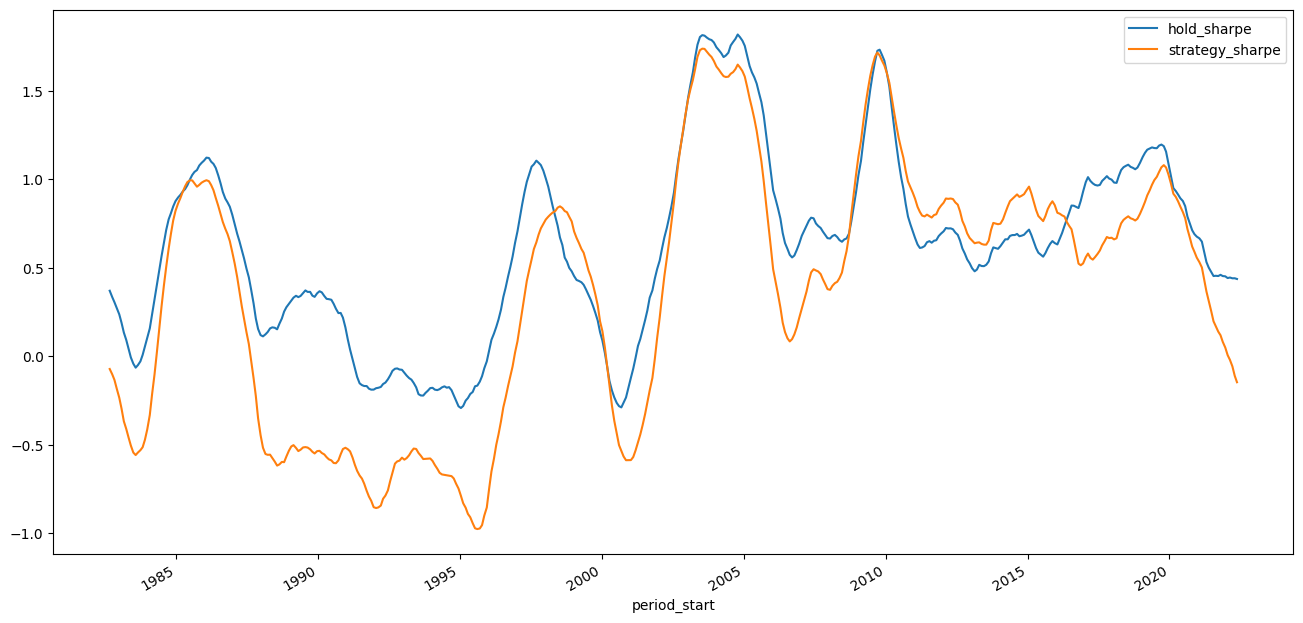

In [75]:
df_rolling_backtest[['hold_sharpe', 'strategy_sharpe']].rolling(12).mean().plot(figsize=(16,8))

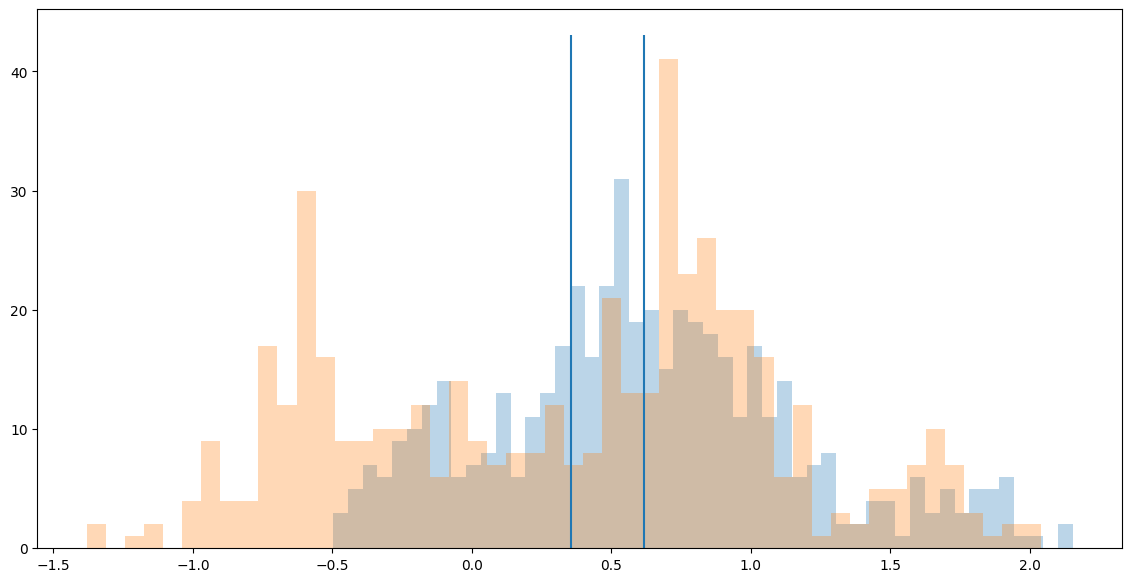

In [76]:
fig, ax = plt.subplots(figsize=(14,7))
ax.hist(df_rolling_backtest['hold_sharpe'], alpha=0.3, bins=50)
ax.hist(df_rolling_backtest['strategy_sharpe'], alpha=0.3, bins=50)

ymin, ymax = ax.get_ybound()
ax.vlines(x=df_rolling_backtest['hold_sharpe'].mean(), ymin=ymin, ymax=ymax)
ax.vlines(x=df_rolling_backtest['strategy_sharpe'].mean(), ymin=ymin, ymax=ymax)
plt.show();

<Axes: ylabel='Frequency'>

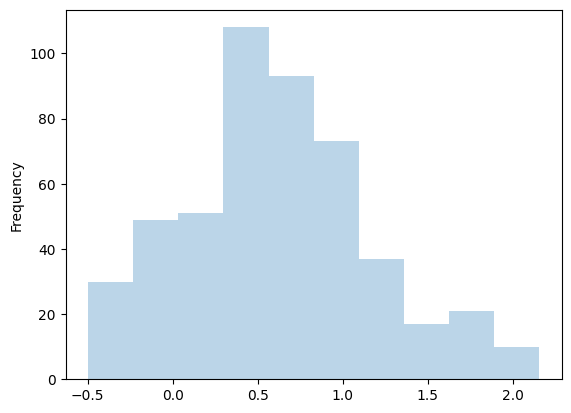

In [54]:
df_rolling_backtest['hold_sharpe'].plot(kind="hist", alpha=0.3)

<Axes: ylabel='Frequency'>

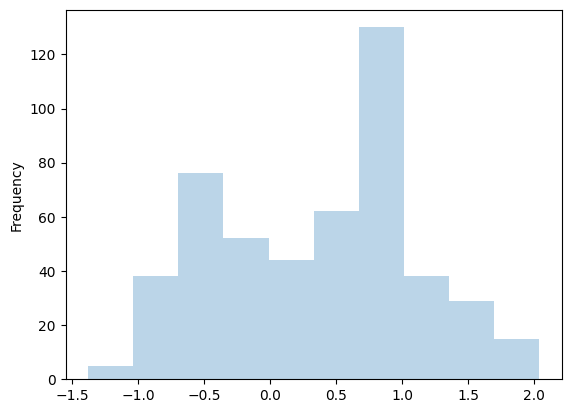

In [53]:
df_rolling_backtest['strategy_sharpe'].plot(kind="hist", alpha=0.3)

In [138]:
df_rolling_backtest[["hold_sharpe", "strategy_sharpe"]]

,hold_sharpe,strategy_sharpe
0,0.318299,-0.029403
1,0.121984,-0.199293
2,-0.053591,-0.261630
3,0.105646,-0.423650
4,-0.256297,-0.834308
5,-0.833394,-1.209466
6,-0.473837,-1.250125
7,-0.224996,-1.104956
8,-0.097359,-1.202764
9,0.210439,-0.727163


## Applying recency weighting to backtesting

In [ ]:
decay_rate = 0.95
weights = np.array([decay_rate**i for i in reversed(range(len(df_backtest)))])
weights

In [ ]:
df_backtest

In [ ]:
(df_backtest.mul(weights, axis=0) / np.sum(weights)).plot()

## Paramenter Optimization using a gridsearch